# 🏥 Medical Cost & Insurance Approval Prediction
## EDA and Model Training Notebook

This notebook performs:
1. **Exploratory Data Analysis (EDA)**
2. **Data Preprocessing** 
3. **Regression Model Training** (Medical Cost Prediction)
4. **Classification Model Training** (Insurance Approval Prediction)
5. **Model Evaluation**
6. **Model Saving**

In [112]:
#Name:Anuj Parwal
#Roll No: A1-17

## 📚 Import Libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

## 📊 Data Loading and Inspection

In [114]:
df = pd.read_csv('../data/insurance.csv')

print("🔍 Dataset Shape:", df.shape)
print("\n📋 First 5 rows:")
print(df.head())

🔍 Dataset Shape: (1338, 7)

📋 First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [115]:
print("📊 Dataset Info:")
df.info()

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [116]:
print("📈 Statistical Summary:")
df.describe()

📈 Statistical Summary:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 🔍 Duplicate Detection and Removal


In [117]:
# Check for duplicate rows
print("🔍 Checking for Duplicate Rows...")
duplicate_count = df.duplicated().sum()
print(f"📊 Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print(f"Found {duplicate_count} duplicate rows. Removing them...")
    df = df.drop_duplicates()
    print(f"Duplicates removed! New shape: {df.shape}")
else:
    print("No duplicate rows found!")

print(f"\nFinal dataset shape: {df.shape}")


🔍 Checking for Duplicate Rows...
📊 Number of duplicate rows: 1
Found 1 duplicate rows. Removing them...
Duplicates removed! New shape: (1337, 7)

Final dataset shape: (1337, 7)


In [118]:
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\nNo missing values found!")
else:
    print(f"\nTotal missing values: {missing_values.sum()}")

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values found!


## 📊 Outlier Detection and Analysis


Detecting Outliers using IQR Method...

AGE:
   Q1: 27.00, Q3: 51.00, IQR: 24.00
   Outliers: 0 (0.0%)
   Range: [-9.00, 87.00]

BMI:
   Q1: 26.29, Q3: 34.70, IQR: 8.41
   Outliers: 9 (0.7%)
   Range: [13.67, 47.32]

CHARGES:
   Q1: 4746.34, Q3: 16657.72, IQR: 11911.37
   Outliers: 139 (10.4%)
   Range: [-13120.72, 34524.78]


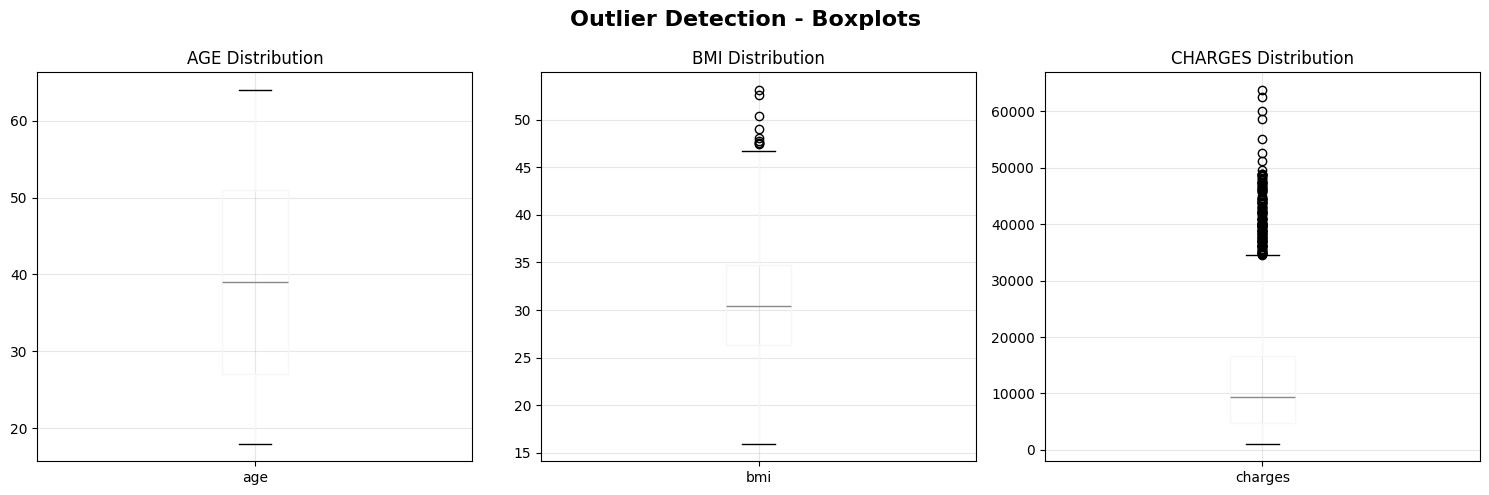

In [119]:
# Detect outliers using IQR method
print("Detecting Outliers using IQR Method...")

numerical_cols = ['age', 'bmi', 'charges']
outlier_info = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    
    outlier_info[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_count': outlier_count
    }
    
    print(f"\n{col.upper()}:")
    print(f"   Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"   Outliers: {outlier_count} ({outlier_count/len(df)*100:.1f}%)")
    print(f"   Range: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Visualize outliers with boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Outlier Detection - Boxplots', fontsize=16, fontweight='bold')

for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'{col.upper()} Distribution')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [120]:
# Handle outliers 
print("Handling Outliers ....")

df_original = df.copy()  # Keep original for comparison

for col in numerical_cols:
    info = outlier_info[col]
    lower_bound = info['lower_bound']
    upper_bound = info['upper_bound']
    
    # Cap outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    # Count how many values were capped
    original_outliers = df_original[(df_original[col] < lower_bound) | (df_original[col] > upper_bound)]
    capped_count = len(original_outliers)
    
    print(f"{col.upper()}: Capped {capped_count} outliers")

print(f"\nOutlier handling completed!")
print(f"Dataset shape remains: {df.shape}")



Handling Outliers ....
AGE: Capped 0 outliers
BMI: Capped 9 outliers
CHARGES: Capped 139 outliers

Outlier handling completed!
Dataset shape remains: (1337, 7)


In [121]:
print("Unique values in categorical columns:")
categorical_cols = ['sex', 'smoker', 'region']

for col in categorical_cols:
    print(f"\n{col}: {df[col].unique()}")
    print(f"Value counts:\n{df[col].value_counts()}")

Unique values in categorical columns:

sex: ['female' 'male']
Value counts:
sex
male      675
female    662
Name: count, dtype: int64

smoker: ['yes' 'no']
Value counts:
smoker
no     1063
yes     274
Name: count, dtype: int64

region: ['southwest' 'southeast' 'northwest' 'northeast']
Value counts:
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


## 📊 Univariate Analysis

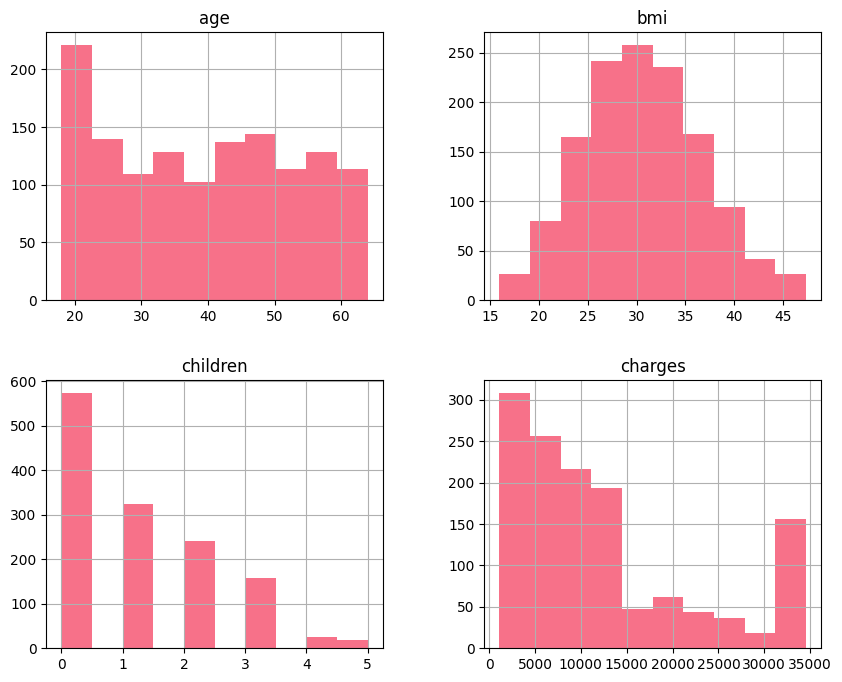

In [122]:
df.hist(figsize = (10,8))
plt.show()

## 📊 Bivariate Analysis


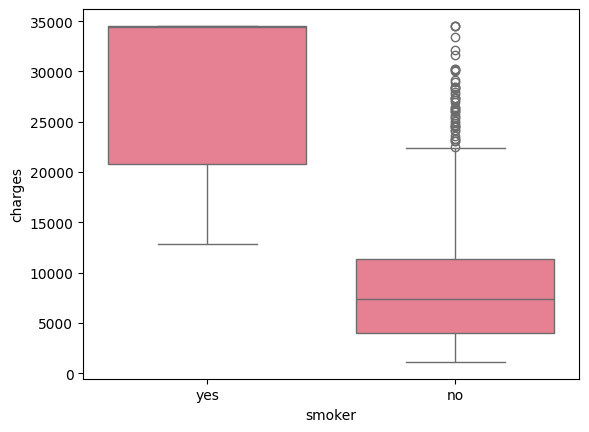

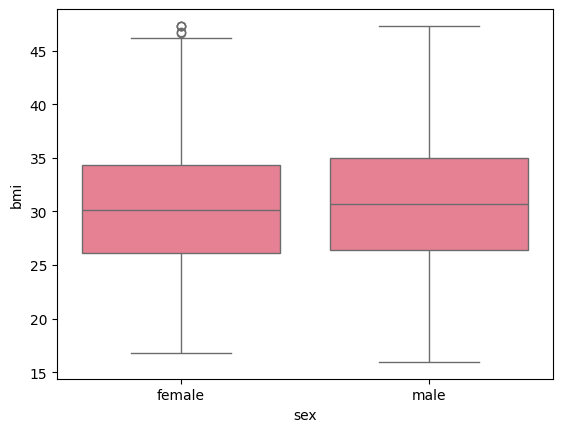

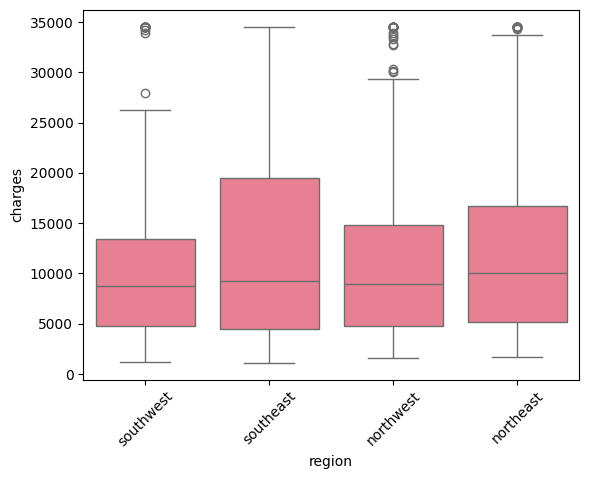

In [123]:
# Age vs Charges by Smoker status
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()

# BMI vs Charges by Sex
sns.boxplot(x='sex', y='bmi', data=df)
plt.show()

# Charges by Region
sns.boxplot(x='region', y='charges', data=df)
plt.tick_params(axis='x', rotation=45)
plt.show()

## 📊 Multivariate Analysis


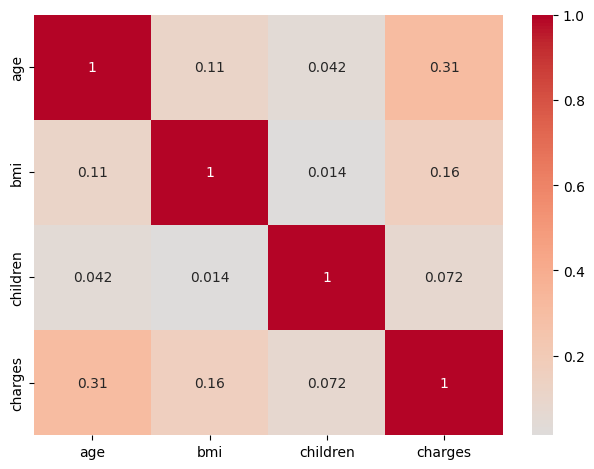

In [124]:
# Multivariate analysis
import seaborn as sns

# Calculate correlation only for numeric columns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.tight_layout()
plt.show()

## 🔧 Data Preprocessing

## Data Encoding Techniques


In [125]:
# Label Encoding for binary categorical variables
print("Applying Label Encoding...")

from sklearn.preprocessing import LabelEncoder

# Create a copy for label encoding demonstration
df_label_encoded = df.copy()

# Apply label encoding to binary categorical columns
label_encoders = {}
binary_cols = ['sex', 'smoker']

for col in binary_cols:
    le = LabelEncoder()
    df_label_encoded[col + '_encoded'] = le.fit_transform(df_label_encoded[col])
    label_encoders[col] = le
    
    print(f"\n{col.upper()} Label Encoding:")
    print(f"   Original values: {df[col].unique()}")
    print(f"   Encoded values: {df_label_encoded[col + '_encoded'].unique()}")
    print(f"   Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print(f"\nLabel encoding completed!")
print(f"Dataset shape after label encoding: {df_label_encoded.shape}")

# Show first few rows with encoded values
print(f"\nSample of Label Encoded Data:")
print(df_label_encoded[['sex', 'sex_encoded', 'smoker', 'smoker_encoded']].head(10))


Applying Label Encoding...

SEX Label Encoding:
   Original values: ['female' 'male']
   Encoded values: [0 1]
   Mapping: {'female': np.int64(0), 'male': np.int64(1)}

SMOKER Label Encoding:
   Original values: ['yes' 'no']
   Encoded values: [1 0]
   Mapping: {'no': np.int64(0), 'yes': np.int64(1)}

Label encoding completed!
Dataset shape after label encoding: (1337, 9)

Sample of Label Encoded Data:
      sex  sex_encoded smoker  smoker_encoded
0  female            0    yes               1
1    male            1     no               0
2    male            1     no               0
3    male            1     no               0
4    male            1     no               0
5  female            0     no               0
6  female            0     no               0
7  female            0     no               0
8    male            1     no               0
9  female            0     no               0


Approval Status Distribution:
approval_status
1    979
0    358
Name: count, dtype: int64

Approval Rate: 73.22%


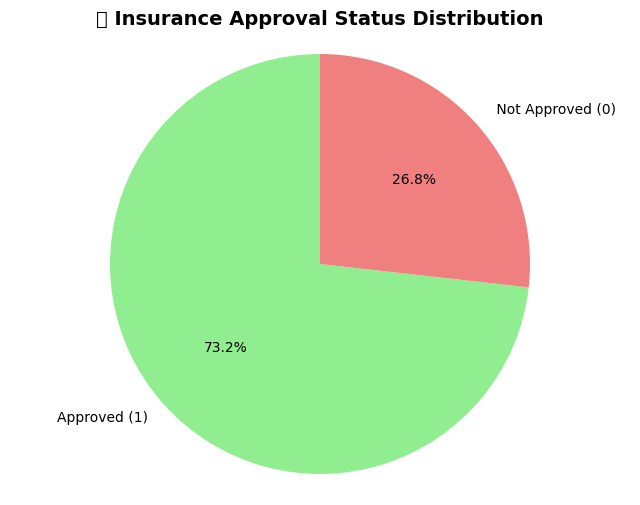

In [126]:
# Create approval_status column for classification
df['approval_status'] = (df['charges'] < 15000).astype(int)

print("Approval Status Distribution:")
print(df['approval_status'].value_counts())
print(f"\nApproval Rate: {df['approval_status'].mean():.2%}")

# Visualize approval status distribution
plt.figure(figsize=(8, 6))
approval_counts = df['approval_status'].value_counts()
plt.pie(approval_counts.values, labels=['Approved (1)', ' Not Approved (0)'], 
        autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('🎯 Insurance Approval Status Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

In [127]:
# Prepare features and targets
print("Preparing Features and Targets...")

# Features (exclude charges and approval_status)
feature_columns = [col for col in df_encoded.columns if col not in ['charges', 'approval_status']]
X = df_encoded[feature_columns]

# Targets
y_regression = df_encoded['charges']  # For regression
y_classification = df_encoded['approval_status']  # For classification

print(f"Features shape: {X.shape}")
print(f"Regression target shape: {y_regression.shape}")
print(f"Classification target shape: {y_classification.shape}")

print(f"\nFeature columns:")
for i, col in enumerate(X.columns, 1):
    print(f"{i:2d}. {col}")

Preparing Features and Targets...
Features shape: (1337, 11)
Regression target shape: (1337,)
Classification target shape: (1337,)

Feature columns:
 1. age
 2. bmi
 3. children
 4. sex_female
 5. sex_male
 6. smoker_no
 7. smoker_yes
 8. region_northeast
 9. region_northwest
10. region_southeast
11. region_southwest


In [128]:
# Split data for regression
print("Splitting Data for Regression...")
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)

print(f"Training set: {X_train_reg.shape[0]} samples")
print(f"Test set: {X_test_reg.shape[0]} samples")

# Split data for classification
print("\nSplitting Data for Classification...")
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_classification, test_size=0.2, random_state=42, stratify=y_classification
)

print(f"Training set: {X_train_clf.shape[0]} samples")
print(f"Test set: {X_test_clf.shape[0]} samples")
print(f"Training approval rate: {y_train_clf.mean():.2%}")
print(f"Test approval rate: {y_test_clf.mean():.2%}")

Splitting Data for Regression...
Training set: 1069 samples
Test set: 268 samples

Splitting Data for Classification...
Training set: 1069 samples
Test set: 268 samples
Training approval rate: 73.25%
Test approval rate: 73.13%


In [129]:
# Feature scaling
print("Applying Feature Scaling...")

scaler = StandardScaler()

# Fit scaler on training data and transform both training and test sets
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

X_train_clf_scaled = scaler.transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

print("Feature scaling completed!")
print(f"Scaled training features shape: {X_train_reg_scaled.shape}")
print(f"Scaled test features shape: {X_test_reg_scaled.shape}")

Applying Feature Scaling...
Feature scaling completed!
Scaled training features shape: (1069, 11)
Scaled test features shape: (268, 11)


In [130]:
# Train model with best parameters
print("Training Random Forest with Best Parameters...")

# Create model with best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)

# Train the model
best_rf.fit(X_train_clf_scaled, y_train_clf)

# Make predictions
y_train_pred_tuned = best_rf.predict(X_train_clf_scaled)
y_test_pred_tuned = best_rf.predict(X_test_clf_scaled)

# Calculate accuracies
train_accuracy_tuned = accuracy_score(y_train_clf, y_train_pred_tuned)
test_accuracy_tuned = accuracy_score(y_test_clf, y_test_pred_tuned)

print(f"Tuned model training completed!")
print(f"Training Accuracy: {train_accuracy_tuned:.4f} ({train_accuracy_tuned:.1%})")
print(f"Test Accuracy: {test_accuracy_tuned:.4f} ({test_accuracy_tuned:.1%})")


Training Random Forest with Best Parameters...
Tuned model training completed!
Training Accuracy: 0.9542 (95.4%)
Test Accuracy: 0.9104 (91.0%)


## (A) For Classification Model — e.g. Insurance Approval Prediction

In [131]:
from sklearn.ensemble import RandomForestClassifier

# Original Random Forest model (before tuning)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_clf_scaled, y_train_clf)

# Tuned Random Forest model (already defined)
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train_clf_scaled, y_train_clf)

# Now compare both
train_accuracy = rf_classifier.score(X_train_clf_scaled, y_train_clf)
test_accuracy = rf_classifier.score(X_test_clf_scaled, y_test_clf)

print("Classifier Model Performance:")
print("=" * 50)
print(f"ORIGINAL MODEL:")
print(f"   Training Accuracy: {train_accuracy:.4f} ({train_accuracy:.1%})")
print(f"   Test Accuracy: {test_accuracy:.4f} ({test_accuracy:.1%})")




Classifier Model Performance:
ORIGINAL MODEL:
   Training Accuracy: 1.0000 (100.0%)
   Test Accuracy: 0.9104 (91.0%)


## (B) For Regression Model — e.g. Medical Cost Prediction

In [132]:
# ...existing code...
import numpy as np
from sklearn.linear_model import LinearRegression

# Simple metric functions (same style as your example)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def r2_custom(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_res / ss_total) if ss_total != 0 else 0.0

lr = LinearRegression()
lr.fit(X_train_reg_scaled, y_train_reg)
y_pred_lr_test = lr.predict(X_test_reg_scaled)
y_pred_lr_train = lr.predict(X_train_reg_scaled)

print("Regression Model Performance:")
print("=" * 50)
print("R2 Score:", r2_custom(y_test_reg.to_numpy(), y_pred_lr_test))
print("MAE:", mae(y_test_reg.to_numpy(), y_pred_lr_test))
print("MSE:", mse(y_test_reg.to_numpy(), y_pred_lr_test))
print("RMSE:", rmse(y_test_reg.to_numpy(), y_pred_lr_test))
print("")


Regression Model Performance:
R2 Score: 0.82109716153946
MAE: 3151.5970290631913
MSE: 20905443.47045413
RMSE: 4572.247092016586



In [133]:
# Hyperparameter tuning using RandomizedSearchCV for Random Forest Classification

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=3,       # 3-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the random search
print("Hyperparameter tuning using RandomizedSearchCV for Random Forest Classification")
random_search.fit(X_train_clf_scaled, y_train_clf)

best_clf = random_search.best_estimator_
test_accuracy_tuned = best_clf.score(X_test_clf_scaled, y_test_clf)

print(f"\nHyperparameter tuning completed!")
print(f"Tuned classifier Test Accuracy: {test_accuracy_tuned:.4f} ({test_accuracy_tuned:.4%})")

Hyperparameter tuning using RandomizedSearchCV for Random Forest Classification
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Hyperparameter tuning completed!
Tuned classifier Test Accuracy: 0.9104 (91.0448%)


In [134]:
# Parameter grid for regression (Random Forest Regressor)
param_grid_reg = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rfr = RandomForestRegressor(random_state=42)
random_search_reg = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_grid_reg,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Running hyperparameter tuning for regression...")
random_search_reg.fit(X_train_reg_scaled, y_train_reg)

best_params_reg = random_search_reg.best_params_
best_score_reg = random_search_reg.best_score_
regression_model = random_search_reg.best_estimator_

print("\nHyperparameter tuning completed!")
print(f"Best parameters (regression): {best_params_reg}")
print(f"Best CV R² (regression): {best_score_reg:.4f} ({best_score_reg:.1%})")

# Evaluate on test set
y_pred_reg = regression_model.predict(X_test_reg_scaled)
test_r2 = r2_score(y_test_reg, y_pred_reg)
test_mae = mean_absolute_error(y_test_reg, y_pred_reg)
test_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
test_mae_pct = 100 * test_mae / (y_test_reg.mean() if y_test_reg.mean() != 0 else 1)
test_rmse_pct = 100 * test_rmse / (y_test_reg.mean() if y_test_reg.mean() != 0 else 1)

print(f"\nTest R²: {test_r2:.4f} ({test_r2:.1%})")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


Running hyperparameter tuning for regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Hyperparameter tuning completed!
Best parameters (regression): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Best CV R² (regression): 0.7925 (79.3%)

Test R²: 0.8636 (86.4%)
Test MAE: 2411.89
Test RMSE: 3992.97


## 🔄 Cross-Validation


Performing K-Fold Cross-Validation for Classification...
Cross-Validation Results (5-Fold):
   Individual scores: [0.92523364 0.92056075 0.94859813 0.92523364 0.93896714]
   Mean score: 0.9317 (93.2%)
   Standard deviation: 0.0105 (1.0%)


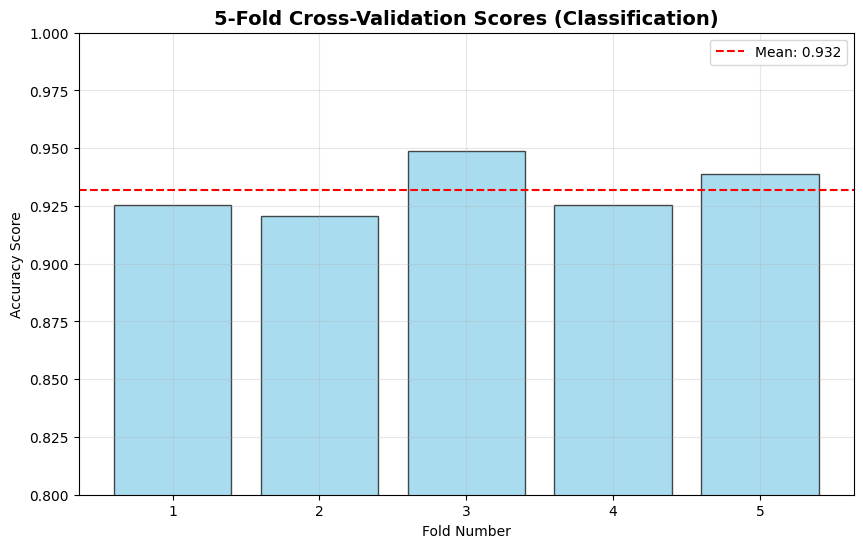


Cross-validation shows model stability: 0.010 std deviation


In [135]:
# K-Fold Cross-Validation for Classification Model
print("Performing K-Fold Cross-Validation for Classification...")

from sklearn.model_selection import cross_val_score

# 5-Fold Cross-Validation for Classification
cv_scores_clf = cross_val_score(best_rf, X_train_clf_scaled, y_train_clf, 
                               cv=5, scoring='accuracy')

print(f"Cross-Validation Results (5-Fold):")
print(f"   Individual scores: {cv_scores_clf}")
print(f"   Mean score: {cv_scores_clf.mean():.4f} ({cv_scores_clf.mean():.1%})")
print(f"   Standard deviation: {cv_scores_clf.std():.4f} ({cv_scores_clf.std():.1%})")

# Visualize cross-validation scores
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), cv_scores_clf, color='skyblue', alpha=0.7, edgecolor='black')
plt.axhline(y=cv_scores_clf.mean(), color='red', linestyle='--', 
           label=f'Mean: {cv_scores_clf.mean():.3f}')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.title('5-Fold Cross-Validation Scores (Classification)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.8, 1.0)
plt.show()

print(f"\nCross-validation shows model stability: {cv_scores_clf.std():.3f} std deviation")


Performing K-Fold Cross-Validation for Regression...
Cross-Validation Results (5-Fold):
   Individual R² scores: [0.75666038 0.8069073  0.78339408 0.81442215 0.80129267]
   Mean R² score: 0.7925 (79.3%)
   Standard deviation: 0.0207 (2.1%)


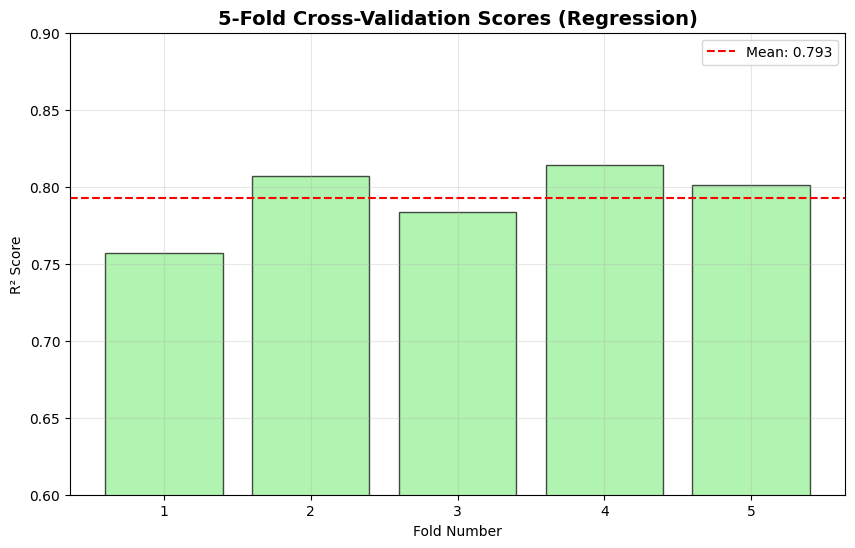


Cross-validation shows regression model stability: 0.021 std deviation


In [136]:
# K-Fold Cross-Validation for Regression Model
print("Performing K-Fold Cross-Validation for Regression...")

# 5-Fold Cross-Validation for Regression
cv_scores_reg = cross_val_score(regression_model, X_train_reg_scaled, y_train_reg, 
                               cv=5, scoring='r2')

print(f"Cross-Validation Results (5-Fold):")
print(f"   Individual R² scores: {cv_scores_reg}")
print(f"   Mean R² score: {cv_scores_reg.mean():.4f} ({cv_scores_reg.mean():.1%})")
print(f"   Standard deviation: {cv_scores_reg.std():.4f} ({cv_scores_reg.std():.1%})")

# Visualize cross-validation scores
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), cv_scores_reg, color='lightgreen', alpha=0.7, edgecolor='black')
plt.axhline(y=cv_scores_reg.mean(), color='red', linestyle='--', 
           label=f'Mean: {cv_scores_reg.mean():.3f}')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.title('5-Fold Cross-Validation Scores (Regression)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.6, 0.9)
plt.show()

print(f"\nCross-validation shows regression model stability: {cv_scores_reg.std():.3f} std deviation")


## 🎯 Regression Model Training (Medical Cost Prediction)

🌟 Feature Importance Analysis (Tuned Model)...


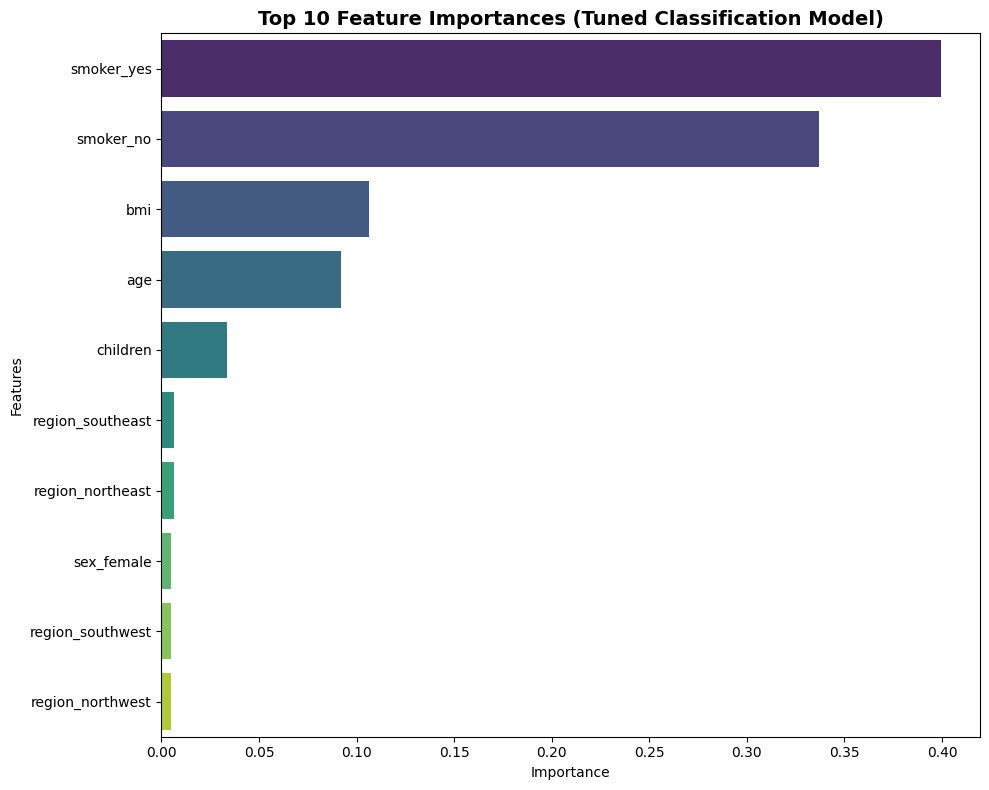


Top 5 Most Important Features:
1. smoker_yes: 0.3995
2. smoker_no: 0.3371
3. bmi: 0.1063
4. age: 0.0922
5. children: 0.0334

Feature Importance Summary:
   Most important: smoker_yes (0.3995)
   Least important: sex_male (0.0044)
   Total features: 11


In [137]:
# Feature importance analysis using tuned model
print("🌟 Feature Importance Analysis (Tuned Model)...")

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(10), y='feature', x='importance', palette='viridis')
plt.title('Top 10 Feature Importances (Tuned Classification Model)', fontsize=14, fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
for i, (_, row) in enumerate(feature_importance.head().iterrows(), 1):
    print(f"{i}. {row['feature']}: {row['importance']:.4f}")

# Show feature importance comparison
print(f"\nFeature Importance Summary:")
print(f"   Most important: {feature_importance.iloc[0]['feature']} ({feature_importance.iloc[0]['importance']:.4f})")
print(f"   Least important: {feature_importance.iloc[-1]['feature']} ({feature_importance.iloc[-1]['importance']:.4f})")
print(f"   Total features: {len(feature_importance)}")


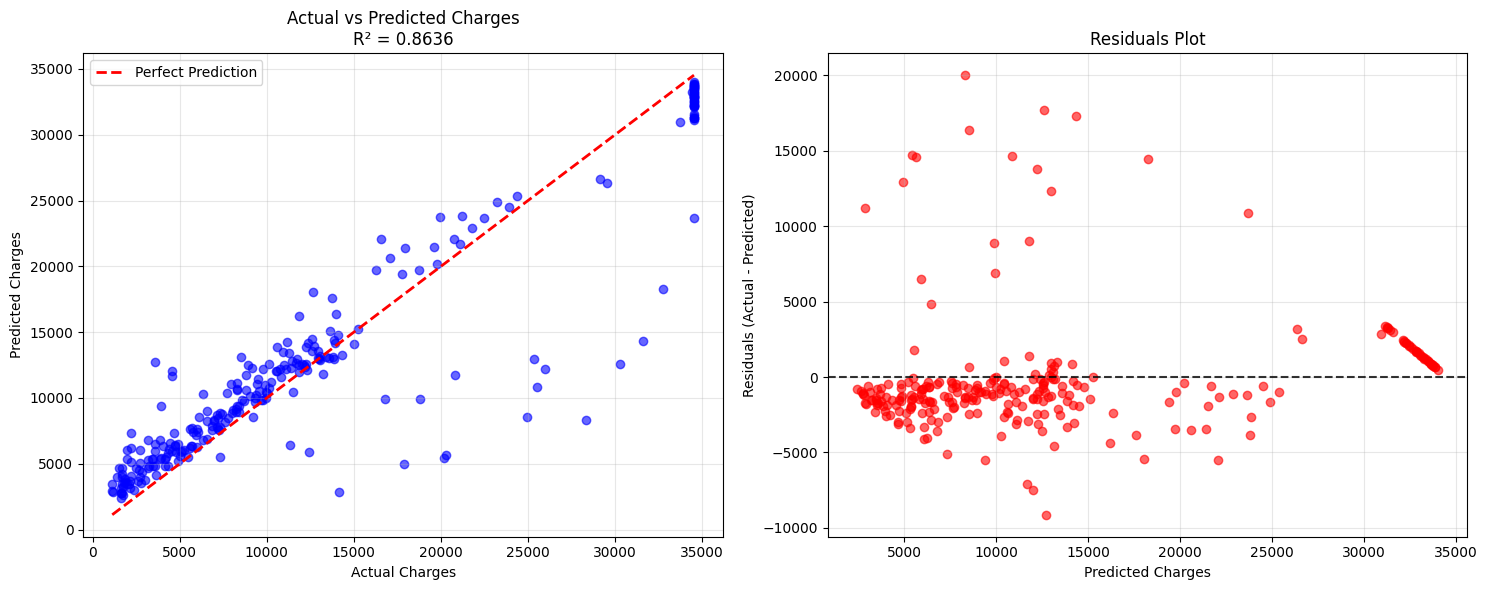

In [141]:
# Visualize regression results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

y_true = np.asarray(y_test_reg).ravel()
y_pred = np.asarray(y_pred_reg).ravel()

# Actual vs Predicted scatter plot
axes[0].scatter(y_true, y_pred, alpha=0.6, color='blue')
mn, mx = y_true.min(), y_true.max()
axes[0].plot([mn, mx], [mn, mx], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Charges')
axes[0].set_ylabel('Predicted Charges')
axes[0].set_title(f'Actual vs Predicted Charges\nR² = {test_r2:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals plot
residuals = y_true - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.6, color='red')
axes[1].axhline(0, color='black', linestyle='--', alpha=0.8)
axes[1].set_xlabel('Predicted Charges')
axes[1].set_ylabel('Residuals (Actual - Predicted)')
axes[1].set_title('Residuals Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

("Interpretation of actual vs. predicted charges:"
      "1. Each blue dot represents one data point (a person's insurance record)."
      "2. The red dashed line shows perfect prediction (y = x). If the model were perfect, all points would lie on this line."
      "3. Points close to the red line indicate accurate predictions; large deviations indicate higher errors.

      "The R² = 0.8636 shown above means:"
      "-> The model explains about 86.36% of the variance in insurance charges."
      "-> This is a reasonably good result for a real-world regression problem.")

("Interpretation of residual graph:"
    "1.Residuals = Actual – Predicted."
    "2.X-axis: Predicted Charges."
    "3.Y-axis: Residuals (error amount)."
    "4.The dashed black line (y=0) means “no error”.
 
 "conclusion:"
   "1.Errors are random → the model fits well."
   "2.Variance is consistent.")


In [ ]:
# Comprehensive Model Loading and Testing
print("Comprehensive Model Testing...")

try:
    # Load all saved models
    loaded_reg_model = joblib.load('../models/regression_model.pkl')
    loaded_clf_model = joblib.load('../models/classification_model.pkl')
    loaded_tuned_model = joblib.load('../models/tuned_classification_model.pkl')
    loaded_scaler = joblib.load('../models/scaler.pkl')
    loaded_features = joblib.load('../models/feature_columns.pkl')
    loaded_hyperparams = joblib.load('../models/best_hyperparameters.pkl')
    
    print("All models loaded successfully!")
    print(f"Loaded hyperparameters: {loaded_hyperparams}")

except Exception as e:
    print(f"Error loading models: {e}")
    print("Please ensure all models are saved before testing.")

# Test with edge cases
print("\nTesting with Edge Cases:")
edge_cases = [
    {"age": 18, "bmi": 15.0, "children": 0, "sex": "female", "smoker": "no", "region": "southwest"},  # Young, low BMI
    {"age": 65, "bmi": 40.0, "children": 5, "sex": "male", "smoker": "yes", "region": "northeast"},   # Old, high BMI, smoker
    {"age": 30, "bmi": 25.0, "children": 0, "sex": "female", "smoker": "no", "region": "northwest"},  # Average case
]

for i, case in enumerate(edge_cases, 1):
    try:
        # Create DataFrame for the test case
        test_df = pd.DataFrame([case])
        
        # One-hot encode
        test_encoded = pd.get_dummies(test_df, columns=['sex', 'smoker', 'region'], drop_first=False)
        
        # Ensure all columns are present
        for col in loaded_features:
            if col not in test_encoded.columns:
                test_encoded[col] = 0
        
        # Reorder columns to match training
        test_encoded = test_encoded[loaded_features]
        
        # Scale features
        test_scaled = loaded_scaler.transform(test_encoded)
        
        # Make predictions with both models
        predicted_cost = loaded_reg_model.predict(test_scaled)[0]
        predicted_approval_orig = loaded_clf_model.predict(test_scaled)[0]
        predicted_approval_tuned = loaded_tuned_model.predict(test_scaled)[0]
        
        approval_proba_orig = loaded_clf_model.predict_proba(test_scaled)[0]
        approval_proba_tuned = loaded_tuned_model.predict_proba(test_scaled)[0]
        
        print(f"\nEdge Case {i}: {case['age']}yr {case['sex']}, BMI:{case['bmi']}, Children:{case['children']}, Smoker:{case['smoker']}")
        print(f"Predicted Cost: ₹{predicted_cost:,.2f}")
        print(f"Original Model: {'APPROVED' if predicted_approval_orig == 1 else 'NOT APPROVED'} (P: {approval_proba_orig[1]:.1%})")
        print(f"Tuned Model: {'APPROVED' if predicted_approval_tuned == 1 else 'NOT APPROVED'} (P: {approval_proba_tuned[1]:.1%})")
        
    except Exception as e:
        print(f"Error testing case {i}: {e}")

print(f"\nComprehensive model testing completed!")


Comprehensive Model Testing...
All models loaded successfully!
Loaded hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}

Testing with Edge Cases:

Edge Case 1: 18yr female, BMI:15.0, Children:0, Smoker:no
Predicted Cost: ₹-3,059.07
Original Model: APPROVED (P: 95.7%)
Tuned Model: APPROVED (P: 99.2%)

Edge Case 2: 65yr male, BMI:40.0, Children:5, Smoker:yes
Predicted Cost: ₹44,014.83
Original Model: NOT APPROVED (P: 11.7%)
Tuned Model: NOT APPROVED (P: 4.3%)

Edge Case 3: 30yr female, BMI:25.0, Children:0, Smoker:no
Predicted Cost: ₹3,834.69
Original Model: APPROVED (P: 96.7%)
Tuned Model: APPROVED (P: 99.9%)

Comprehensive model testing completed!


In [ ]:
# Evaluate classification model
print("Classification Model Evaluation:")
print("=" * 50)

# Training accuracy
train_accuracy = accuracy_score(y_train_clf, y_train_pred_clf)
test_accuracy = accuracy_score(y_test_clf, y_test_pred_clf)

print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy:.1%})")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy:.1%})")

print(f"\nDetailed Classification Report:")
print(classification_report(y_test_clf, y_test_pred_clf, 
                          target_names=['Not Approved', 'Approved']))

Classification Model Evaluation:
Training Accuracy: 0.9420 (94.2%)
Test Accuracy: 0.9104 (91.0%)

Detailed Classification Report:
              precision    recall  f1-score   support

Not Approved       1.00      0.67      0.80        72
    Approved       0.89      1.00      0.94       196

    accuracy                           0.91       268
   macro avg       0.95      0.83      0.87       268
weighted avg       0.92      0.91      0.90       268



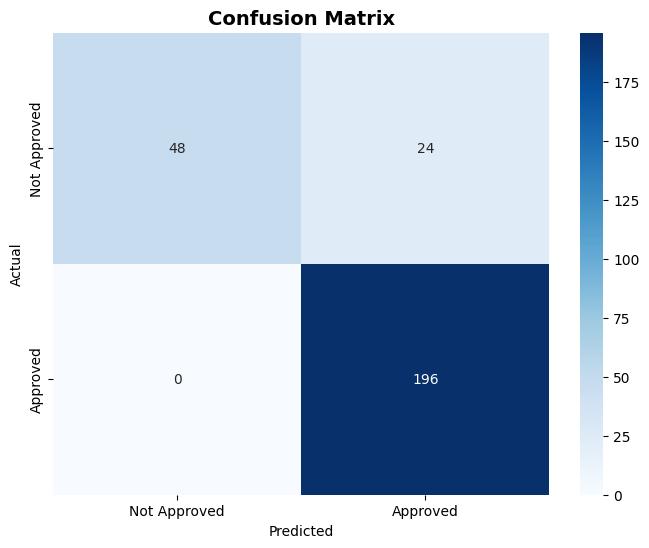


Additional Metrics for 'Approved' Class:
   Precision: 0.8909
   Recall: 1.0000
   F1-Score: 0.9423


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test_clf, y_test_pred_clf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate additional metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
precision_approved = tp / (tp + fp)
recall_approved = tp / (tp + fn)
f1_approved = 2 * (precision_approved * recall_approved) / (precision_approved + recall_approved)

print(f"\nAdditional Metrics for 'Approved' Class:")
print(f"   Precision: {precision_approved:.4f}")
print(f"   Recall: {recall_approved:.4f}")
print(f"   F1-Score: {f1_approved:.4f}")

In [ ]:
# Save tuned model and hyperparameters
print("Saving Tuned Model and Hyperparameters...")

# Save tuned classification model
joblib.dump(best_rf, '../models/tuned_classification_model.pkl')
print("Tuned classification model saved to '../models/tuned_classification_model.pkl'")

# Save hyperparameters for reference
joblib.dump(best_params, '../models/best_hyperparameters.pkl')
print("Best hyperparameters saved to '../models/best_hyperparameters.pkl'")

# Save cross-validation results
cv_results = {
    'classification_scores': cv_scores_clf,
    'regression_scores': cv_scores_reg,
    'classification_mean': cv_scores_clf.mean(),
    'classification_std': cv_scores_clf.std(),
    'regression_mean': cv_scores_reg.mean(),
    'regression_std': cv_scores_reg.std()
}
joblib.dump(cv_results, '../models/cross_validation_results.pkl')
print("Cross-validation results saved to '../models/cross_validation_results.pkl'")

print("\nAll tuned models and results saved successfully!")


Saving Tuned Model and Hyperparameters...
Tuned classification model saved to '../models/tuned_classification_model.pkl'
Best hyperparameters saved to '../models/best_hyperparameters.pkl'
Cross-validation results saved to '../models/cross_validation_results.pkl'

All tuned models and results saved successfully!
